# Example 6: Tracking of vesicles 1.0

Example code to use DeepTrack to track fluorescent particles representing biological vesicle. Image data generated with the open bioimage informatics platform Icy (http://dx.doi.org/10.1038/nmeth.2075). See also Figure 5.

Note that this is an example file to track the case of <font color=red><strong>SNR 4<strong></font> and <font color=red><strong>medium density<strong></font>. The same training file can be used to track other cases but the parameters <strong>frame_enhance</strong>, <strong>particle_radial_distance_threshold</strong> and <strong>particle_maximum_interdistance</strong> might have to be adjusted. 


<strong>DeepTrack 1.0</strong><br/>
Digital Video Microscopy enhanced with Deep Learning<br/>
version 1.0 - 30 November 2018<br/>
© Saga Helgadottir, Aykut Argun & Giovanni Volpe<br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INITIALIZATION

In [1]:
import deeptrack

## 2. PLAY VIDEO TO BE TRACKED

The video to be tracked is played. 

Video file: DeepTrack - Example 6 - Vesicles SNR4 mid.mp4

Note that the video file must be in the same folder as this notebook.

In [2]:
%%HTML 

<video width="400" height="400" controls>
<source src="DeepTrack - Example 6 - Vesicles SNR4 mid.mp4" type="video/mp4">
</video>

## 3. CHECK IMAGE GENERATION ROUTINE

Here, we simulate images of multiple particles similar to those we want to track. 

Comments:
1. The <strong>image_parameters_function</strong> is a lambda function that determines the kind of particle images for which the deep learning network will be trained. Tuning its parameters is the simplest way to improve the tracking performance.<br/>
2. The <strong>image_generator</strong> is a lambda function that works as image genrator. It does not need to be changed in most cases.<br/>
3. The parameter <strong>number_of_images_to_show</strong> determines the number of sample images that are shown.
4. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.

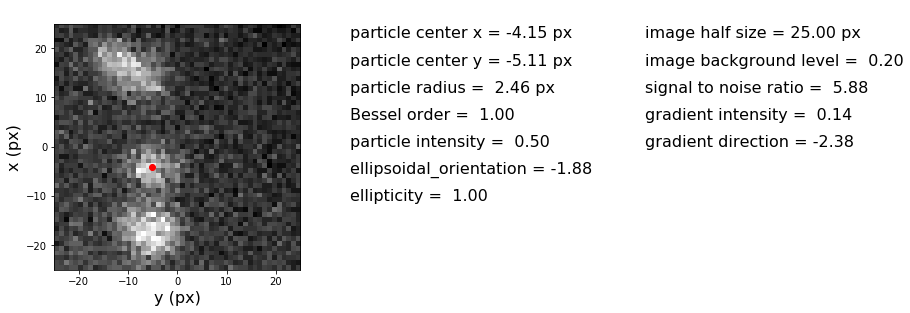

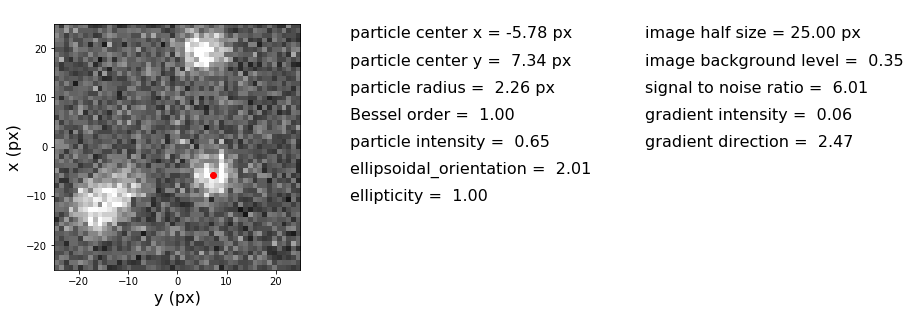

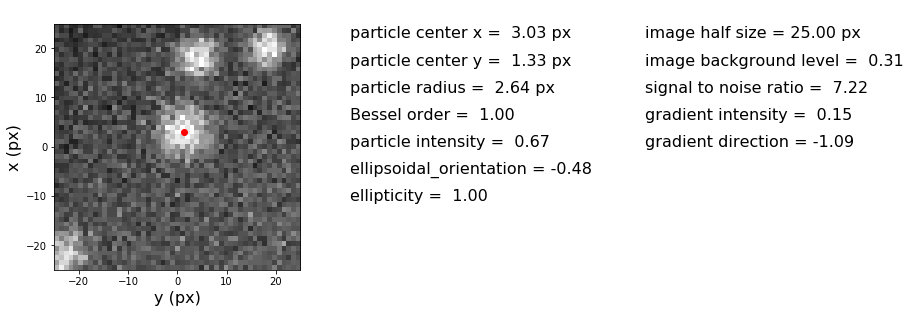

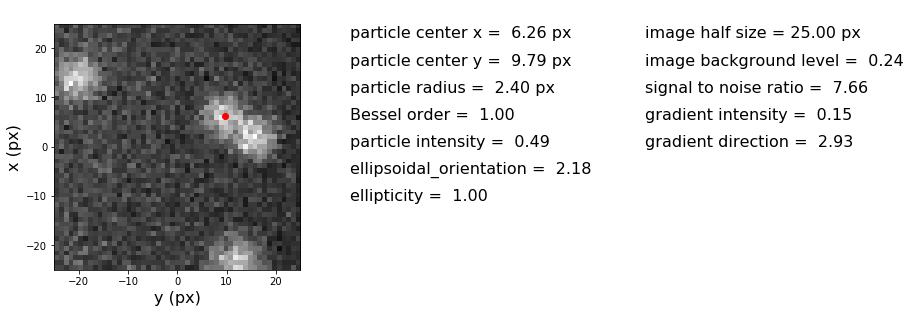

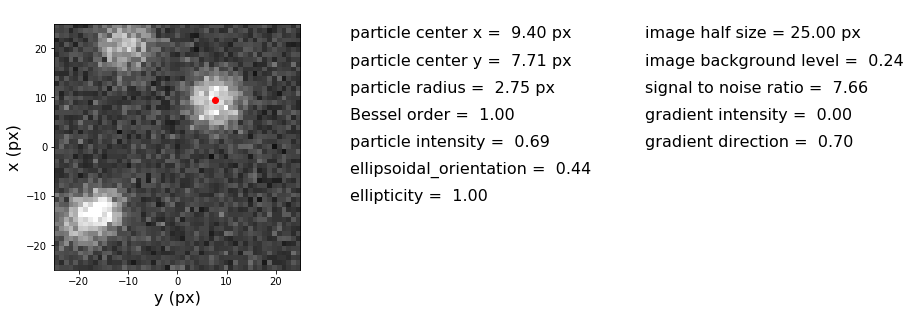

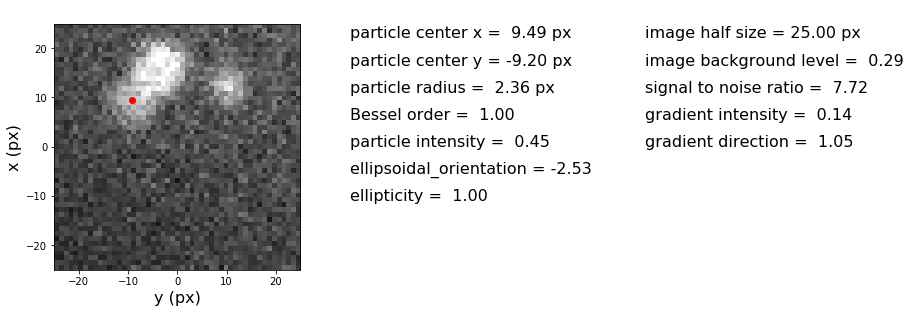

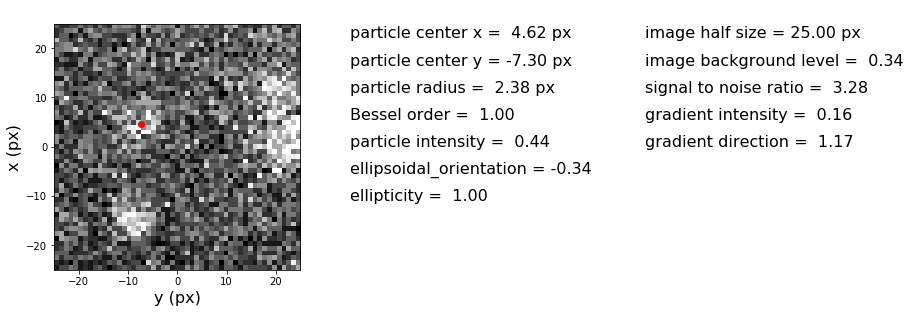

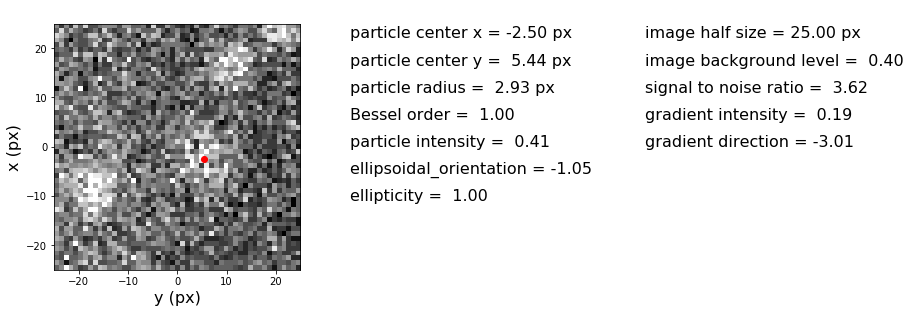

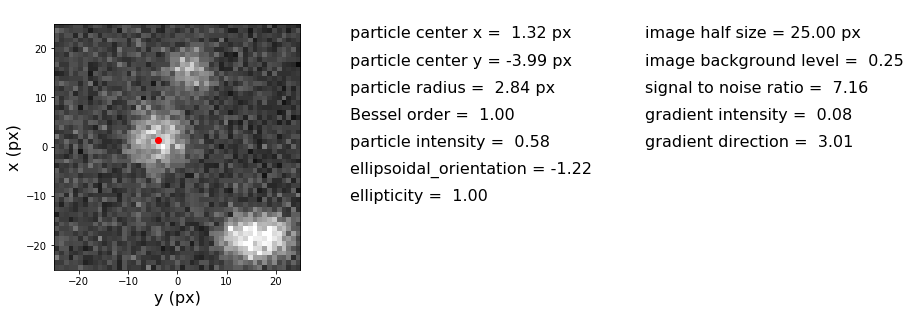

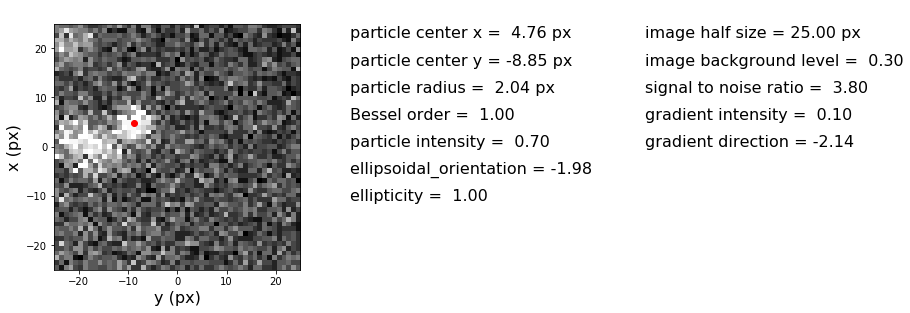

In [3]:
### Define image properties
%matplotlib inline
from numpy.random import randint, uniform, normal, choice
from math import pi

particle_number = 4
first_particle_range = 10
other_particle_range = 25
particle_distance = 10


def get_image_parameters_optimized():
    (particles_center_x, particles_center_y) = deeptrack.particle_positions(particle_number, first_particle_range, other_particle_range, particle_distance)
    image_parameters = {}

    image_parameters['Particle Center X List'] = particles_center_x
    image_parameters['Particle Center Y List'] = particles_center_y
    image_parameters['Particle Radius List'] = uniform(2, 3, particle_number)
    image_parameters['Particle Bessel Orders List'] = [[1, ], 
                                                       [1, ],
                                                       [1, ], 
                                                       [1, ]]
    image_parameters['Particle Intensities List'] = [[uniform(0.4, 0.7, 1), ], 
                                                     [uniform(0.4, 0.7, 1), ],
                                                     [uniform(0.4, 0.7, 1), ], 
                                                     [uniform(0.4, 0.7, 1), ]]
    image_parameters['Image Half-Size'] = 25
    image_parameters['Image Background Level'] = uniform(.2, .4)
    image_parameters['Signal to Noise Ratio'] = uniform(2, 8)
    image_parameters['Gradient Intensity'] = uniform(0, 0.2)
    image_parameters['Gradient Direction'] = uniform(-pi, pi)
    image_parameters['Ellipsoid Orientation'] = uniform(-pi, pi, particle_number)
    image_parameters['Ellipticity'] = 1

    return image_parameters


image_parameters_function = lambda : get_image_parameters_optimized()

### Define image generator
image_generator = lambda : deeptrack.get_image_generator(image_parameters_function)

### Show some examples of generated images
number_of_images_to_show = 10

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_images_to_show:
        break
    
    deeptrack.plot_sample_image(image, image_parameters)


## 4. USE A PRETRAINED DEEP LEARNING NETWORK

The pretraiend networks saved in the files "DeepTrack - Example 6 - Vesicles SNR4 mid.h5" and DeepTrack - Example 4 - Particles - Pretrained network.h5 are loaded and their performance on selected video is tested.

Video file: DeepTrack - Example 6 - Vesicles SNR4 mid.mp4

Note that the pretrained network files and the video file must be in the same folder as this notebook.

Comments:
1. <strong>number_frames_to_be_tracked</strong> can be changed to track different number of frames. If number_frames is equal to 0 then the whole video is tracked.
2. <strong>box_half_size</strong> is half the size of the box to be scanned over the frames. The resulting sample should be comparable to the training image.
3. <strong>box_scanning_step</strong> is the step that is used to scan the box over the frame. It can be increased for higher accuracy or decreased for lower computational time.
4. <strong>frame_normalize</strong> gives the option to normalize the frames. Set to 1 to normalize, 0 otherwise.
5. <strong>frame_enhance</strong> gives the option to enhance the frames. Set to 1 to track the original frames. 

In [4]:
### Define the video file to be tracked
video_file_name = 'DeepTrack - Example 6 - Vesicles SNR4 mid.mp4'

### Define the number of frames to be tracked
number_frames_to_be_tracked = 2

### Define the size of the box to be scanned over the frames
box_half_size = 10

### Define the scanning step over the frame
box_scanning_step = 3

### Preprocess the images
frame_normalize = 0
frame_enhance = 5

### Load the pretrained network
saved_network_file_name = 'DeepTrack - Example 6 - Tracking vesicles.h5'
network = deeptrack.load(saved_network_file_name)

### Track the video
(number_tracked_frames, frames, predicted_positions_wrt_frame, predicted_positions_wrt_box, boxes_all) = deeptrack.track_video(
    video_file_name, 
    network, 
    number_frames_to_be_tracked, 
    box_half_size, 
    box_scanning_step,
    frame_normalize,
    frame_enhance)

Using TensorFlow backend.


## 5. SHOW EXAMPLES OF TRACKED SCANNING BOXES

The tracked scanning boxes are plotted over a range of frames, rows and columns. 

Comments:
1. <strong>frame_to_be_shown</strong> can be changed to view different frames.
2. <strong>rows_to_be_shown</strong> can be changed to view different rows of each of the frames.
3. <strong>columns_to_be_shown</strong> can be changed to view different columns of each of the frames.
4. The <font color=blue><strong>blue<strong></font> symbol is the deep learning network prediction for the position (x, y).


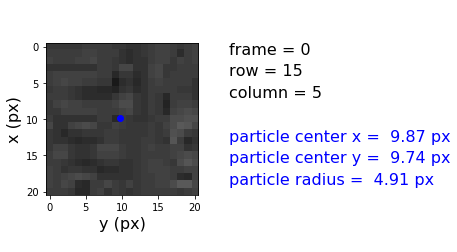

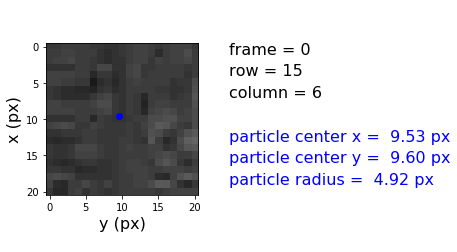

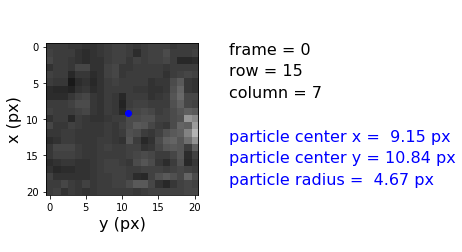

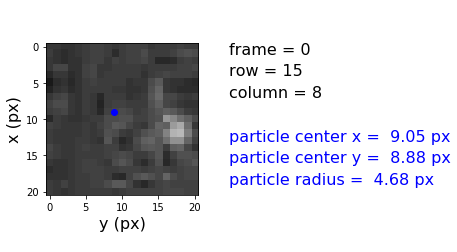

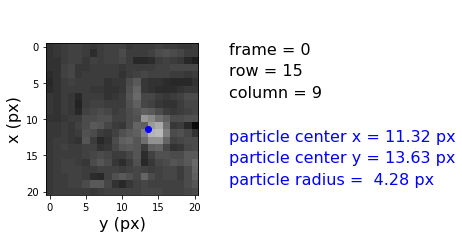

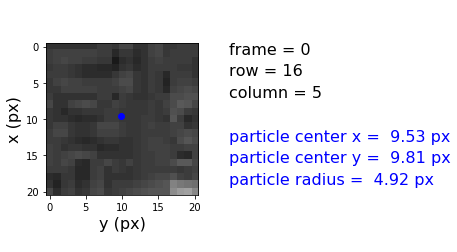

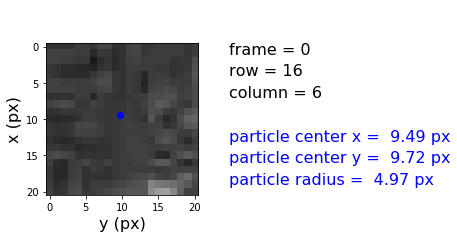

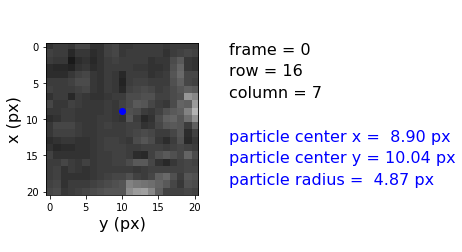

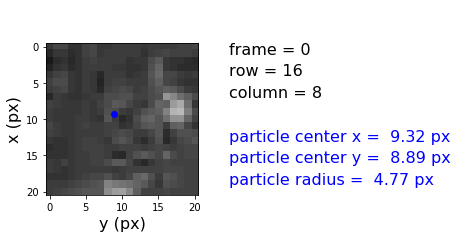

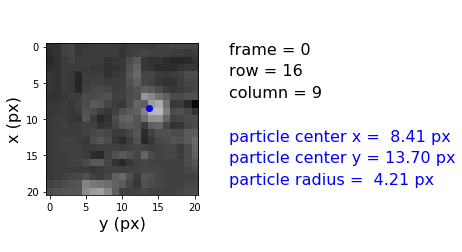

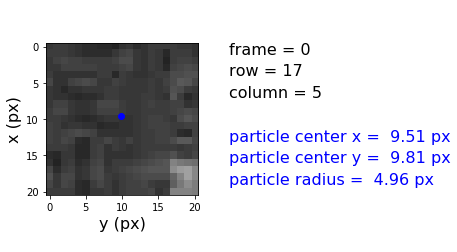

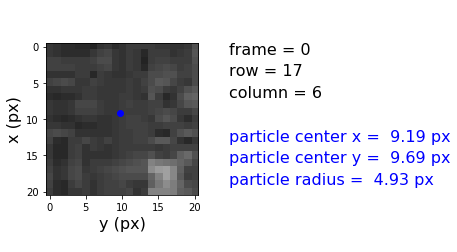

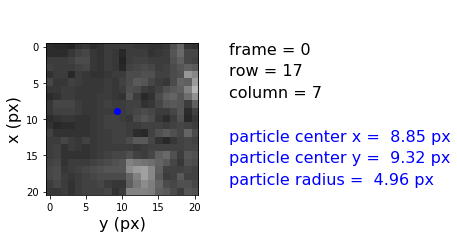

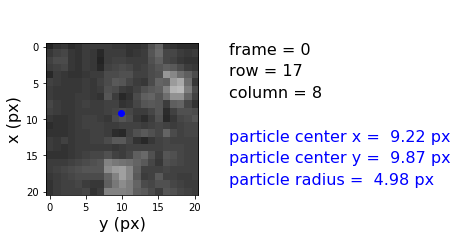

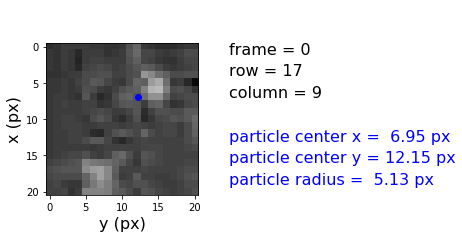

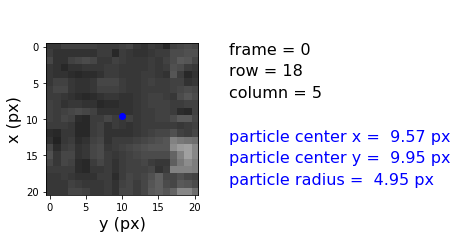

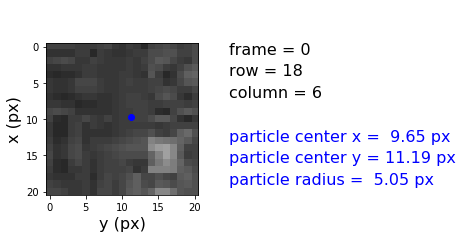

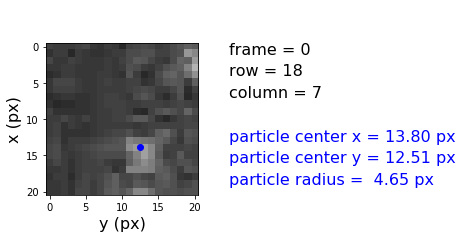

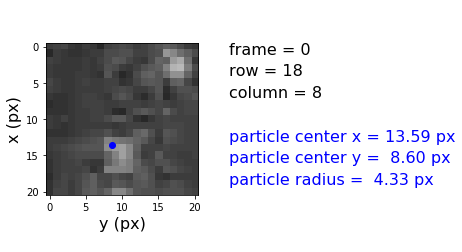

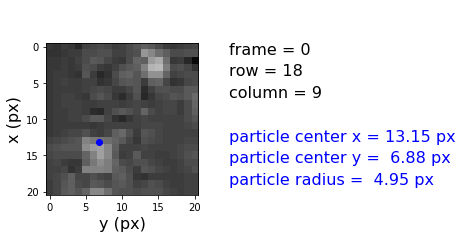

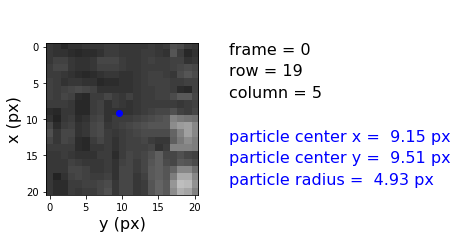

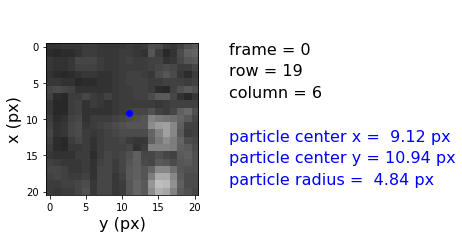

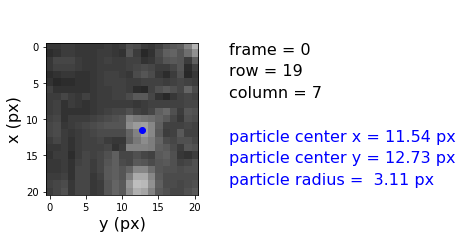

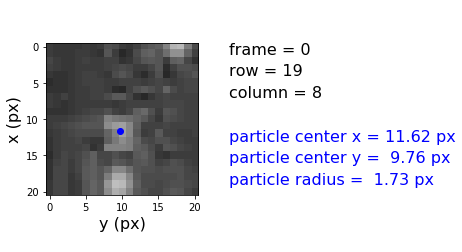

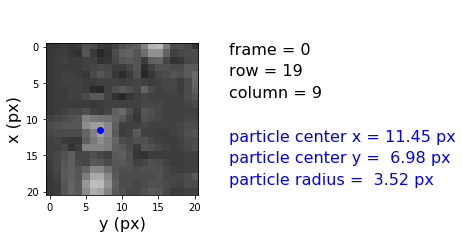

In [5]:
### Define frames, rows and columns of the samples to be shown
frames_to_be_shown = range(1)
rows_to_be_shown = range(15,20)
columns_to_be_shown = range(5,10)

### Show boxes
deeptrack.plot_tracked_scanning_boxes(
    frames_to_be_shown, 
    rows_to_be_shown, 
    columns_to_be_shown, 
    boxes_all, 
    predicted_positions_wrt_box)

## 6. SHOW EXAMPLES OF TRACKED FRAMES

The tracked frames are shown. 

Comments:
1. <strong>particle_radial_distance_threshold</strong> can be changed to choose which prediction points (<font color=blue><strong>blue<strong></font> dots) are to be used to calculate the centroid positions (<font color='#e6661a'><strong>orange<strong></font> circles). We used 3 pixels.
2. <strong>particle_maximum_interdistance</strong> can be changed to choose what predicted points (<font color=blue><strong>blue<strong></font> dots) belong to the same particle. We used 2.8 pixels.


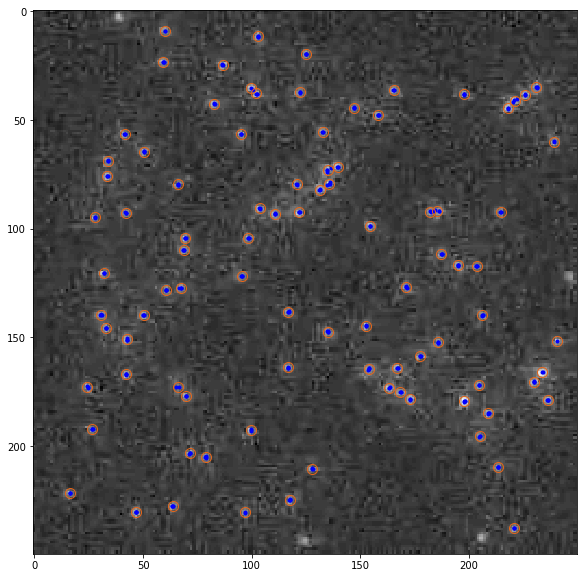

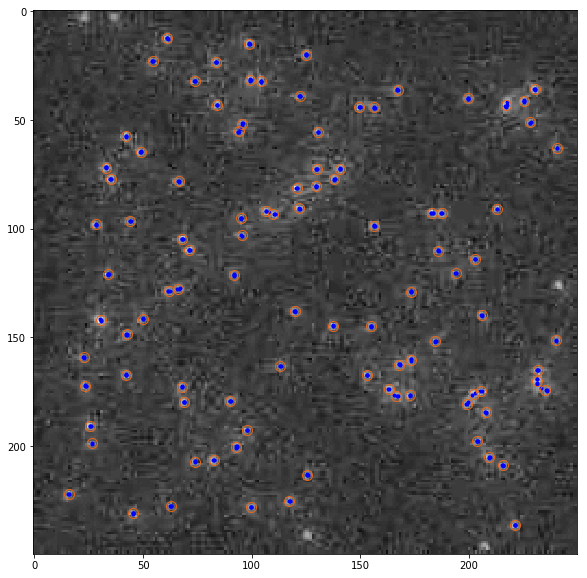

In [6]:
### Define minimum radial distance from the center of the scanning boxes
%matplotlib inline
particle_radial_distance_threshold = 3

### Define the minumum distance between predicted scanning points for them belonging to the same particle
particle_maximum_interdistance = 2.8

### Visualize tracked frames
deeptrack.show_tracked_frames(
    particle_radial_distance_threshold, 
    particle_maximum_interdistance, 
    number_tracked_frames, 
    frames, 
    predicted_positions_wrt_frame)